<a href="https://colab.research.google.com/github/suchirasuresh/Applied-Data-Science-in-Medicine-Psychology-ads_assignment_1--suchira_suresh-/blob/main/10_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fill in your github username and idm credentials below:

In [39]:
github_username = "suchirasuresh"
idm_credentials = "yh07ajaw"

---

# **Applied Data Science in Medicine & Psychology - Assignment 10**
## Machine Learning
---
**Deadline: 04.08.2023, 23:59**
### **General setup and submission**
1. Save an editable copy of this notebook to your Google Drive ``File`` $\rightarrow$ ``Save a copy in Drive`` and remove the automatically appended "Copy of" text. **Do not change the file name**.
2. Work on the assignment in the *copied* version of the notebook. Make sure that you **replace** all parts of the tasks indicated with *YOUR CODE HERE* and **raise NotImplementedError()** (otherwise this causes an error in your implementation) or *YOUR ANSWER HERE* with your solution.
3. If you do a break during the implementation, you can save the current status of your work in your repository following the submission instructions below. When you continue working on the assignment, do this in the version of the notebook that you saved in your Google Drive (access from your Google Colab account) or your repository.
4. After finishing the assignment submit your assignment as follows:
    * Check that everything runs as expected. To do that select in the menubar ``Runtime`` $\rightarrow$ ``Restart and run all``. This will clear all your local variables and runs your notebook from the beginning
    * Save your notebook, click ``File`` $\rightarrow$ ``Save``
    * Click ``File`` $\rightarrow$ ``Save a copy in GitHub``
    * Select ``digikolleg-data-science-psychology/10-ml-<username>`` from the Repository drop-down menu
    * Type ``10_machine_learning.ipynb`` into the File path text box
    * Optionally, you may enter a description into the "Commit message" text box (like: "solved task 1" or "ready for grading")
    * Make sure that the "Include a link to Colaboratory" box is checked
    * Press "Ok"
    * A new tab or window should open up, displaying your submitted notebook within your GitHub repository

Before the assignment deadline, you can re-submit your assignment as often as you would like. This will update the copy of your assignment file in your assignment's repository.

### **Assignment Description**
In this assignment, you will learn how to work with different functionalities provided by the ``scikit-learn`` library (``sklearn``) which offers various tools for predictive data analysis. We will cover four of the eight steps of the Machine Learning pipeline (described in the lecture). The assignment is divided into two parts: the main assignment and Bonus Tasks. The Bonus Tasks offer additional points that are added on top of the points earned in all other assignments, providing an opportunity to further enhance your overall score.

#### **Assignment goals**
You are going to learn the following things in this assignment:
1. how to apply standardization
2. how to extract new features using dimensionality reduction
3. how to split data into a training and test dataset
4. how to train and evaluate a classifier
5. how to predict values using a regression model
6. how to assign labels using clustering algorithms

#### **Assignment point value**
This assignment is worth a total (up to) **19** points (5 Bonus points included). If your code passes all of the manual and automatic tests you will receive full credit.

### **Tasks** (14 points)
Make sure that you now work on your *copied* version of this assignment's notebook.

#### 0. Imports and Setup
Please **run** the cell below to import the libraries needed for this assignment.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install biopsykit
import biopsykit as bp
import seaborn as sns
import sklearn
import warnings
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.cluster import KMeans

#### 1. Data Loading and Preparation
For the following tasks, we use the *Breast Cancer Wisconsin dataset* of the ``scikit-learn`` library. Have a look at the content and structure of the dataset (``dataset_cancer``):
* What is the dataset about?
* How many instances (also called observations) and attributes (also called features) are included?
* How many instances are within every class?

The relevant information needed for the assignment is stored within two data frames:
* ``data_cancer`` contains all instances as rows and the attributes as columns
* ``label_cancer`` indicates whether each breast cancer instance turned out to be malignant or benign

In [41]:
# run cell to load the dataset
dataset_cancer = load_breast_cancer()
data_cancer = pd.DataFrame(dataset_cancer["data"], columns=dataset_cancer["feature_names"])
label_cancer = pd.DataFrame(dataset_cancer["target"], columns=["label"])
label_cancer.loc[label_cancer["label"] == 0, ["label"]] = "malignant"
label_cancer.loc[label_cancer["label"] == 1, ["label"]] = "benign"
data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
# run cell to see the labels
label_cancer.head()

,label
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant


#### 2. Feature Visualization
* Visualize the features *mean radius*, *mean texture*, *mean smoothness*, *mean concavity*, and *mean symmetry* using a [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* Set the plot parameters such that you can differentiate between the classes
* Save the return values of the plot in a variable called ``pp``
* Have a look at the plot. Describe your thoughts about (in the cell below):
    * the distributions of the single features (diagonal). Why is it most of the time advantageous to include more than one feature in your analysis?
    * the separability of classes
    * correlation between features

**Hint**: Concatenating all relevant data to a new data frame might help you to solve this task.

1.The distributions of the single features:
Histograms show the distribution of each feature across all instances in the dataset. By including more than one feature in the analysis, we can explore the relationships between different features and how they interact with each other.

2.The separability of classes:
When classes are well-separated, it indicates that the chosen features are informative and can help distinguish between the two classes effectively.

3.Correlation between features:
Identifying correlations between features is important because highly correlated features can introduce multicollinearity and might not add much additional information for the analysis.

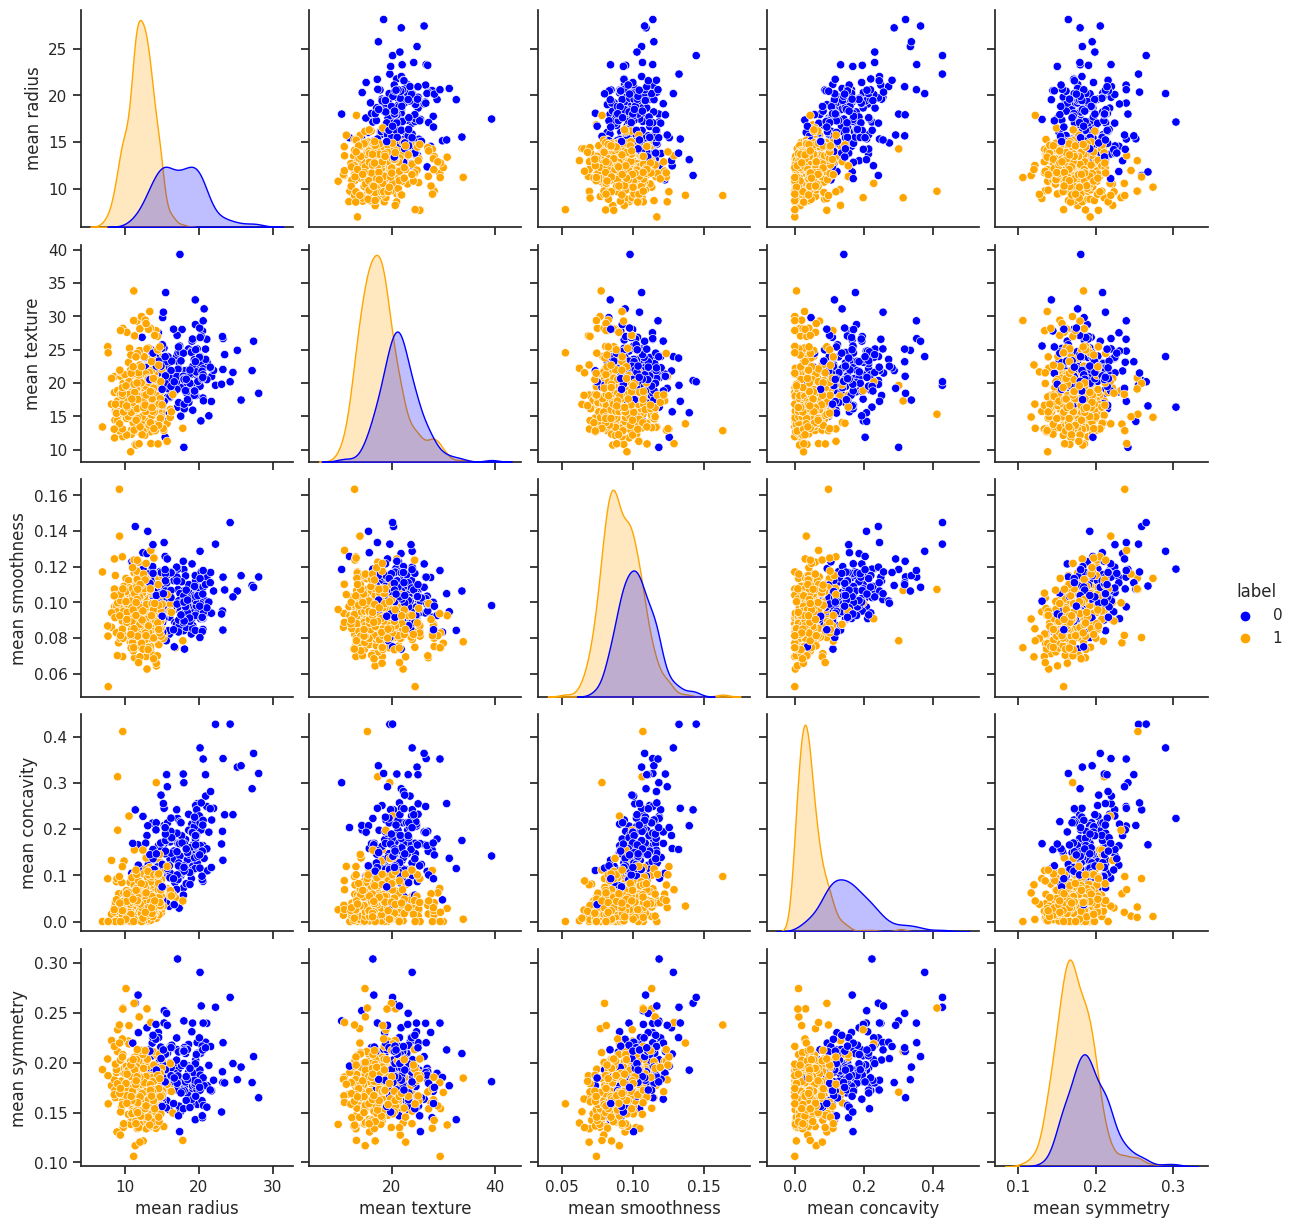

In [43]:
# Load the dataset
data = load_breast_cancer()

# Create a DataFrame for the data and labels
data_cancer = pd.DataFrame(data.data, columns=data.feature_names)
label_cancer = pd.DataFrame(data.target, columns=["label"])

# Concatenate data and labels into a new DataFrame
data_combined = pd.concat([data_cancer[["mean radius", "mean texture", "mean smoothness", "mean concavity", "mean symmetry"]], label_cancer], axis=1)

# Set seaborn plot style
sns.set(style="ticks")

# Create pairplot with different colors for each class
pp = sns.pairplot(data_combined, hue="label", palette={0: "blue", 1: "orange"})

# Show the plot
plt.show()


In [44]:
# run cell to test your implementation
assert type(pp) == sns.axisgrid.PairGrid, "Check that you create a pairplot using the seaborn library"
assert pp.x_vars == pp.y_vars and np.shape(pp.axes) == (5, 5), "Check that you create a pairplot"
assert set(pp.x_vars) == {"mean concavity", "mean radius", "mean smoothness", "mean symmetry", "mean texture"}, "Check the features in the pairplot"
assert pp.legend is not None, "Make sure that you can differentiate between the classes"

#### 3. Standardization (step: Data Preparation)
Create two functions ``train_scaler`` and ``apply_scaler`` that apply [Standardization](https://scikit-learn.org/stable/modules/preprocessing.html) to the dataset:
* ``train_scaler`` has the parameter ``data`` and fits a Standard Scaler to ``data``:
    * ``data``: ``pandas.DataFrame`` containing the dataset (rows: observations, columns: features)
    * Create an instance of [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    * Use its methods to fit the scaler to ``data``
    * The function should return the trained scaler object
* ``apply_scaler`` has the parameter ``scaler`` and ``data``:
    * ``scaler``: trained instance of  [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    * ``data``: ``pandas.DataFrame`` containing the dataset (rows: observations, columns: features)
    * Use the methods of ``scaler`` to transform ``data`` such that every feature individually has zero mean and unit variance
    * The function should return an array containing a standardized version of ``data``
* Why do you think we have to split the fitting and transforming procedure into two separate functions? (answer in the cell below)

We split the fitting and transforming procedure into two separate functions for modularity and reusability. This approach follows good programming practices and makes the code more maintainable.

In [45]:
def train_scaler(data):
    # Create an instance of StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the data
    scaler.fit(data)

    return scaler

def apply_scaler(scaler, data):
    # Use the trained scaler to transform the data
    standardized_data = scaler.transform(data)

    return standardized_data


In [46]:
# run cell to test your implementation
scaler = train_scaler(data_cancer)
assert type(scaler) == sklearn.preprocessing._data.StandardScaler, "Check that you train a Standard Scaler"
assert hasattr(scaler, "mean_"), "Ensure that you fit the Scaler to your data"
data_scaled = apply_scaler(scaler, data_cancer)
assert type(data_scaled) == np.ndarray, "Check that you return the standardized data as array"
assert np.shape(data_scaled) == (569, 30), "Check that you return value keeps the input dimensions"
assert np.sum(np.std(data_scaled, axis=0)) > 29.99, "Ensure that all features have unit variance after standardizing"
assert np.abs(np.sum(np.mean(data_scaled, axis=0))) < 1e-10, "Ensure that all features have zero mean after standardizing"

#### 4. Visualization Standardization
Create a figure with two subplots that visualizes 2 features of the original and standardized dataset:
* Create a figure with two subplots using [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) and save its return values in variables called ``fig`` and ``axs``
* Plot in the first subplot a scatter plot of *mean radius* and *mean texture* of the original dataset
* Plot in the second subplot a scatter plot of *mean radius* and *mean texture* of the standardized dataset
* Set x- and y-axis labels and the subplot titles according to the data
* Describe the effects that standardization has on the data (in the cell below)

**Hints**: Check the data type of the standardized data, how can you access its values? You can also set the parameters ``sharex`` and ``sharey`` of [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to ``True`` to see some of the effects of standardization.

Effects of standardization on the data:

Mean and Centering, scaling and independence from Units;
Standardization transforms the data to have zero mean and unit variance, which makes it easier to compare and interpret the features. It ensures that all features contribute equally to the analysis, irrespective of their original scale or units. Standardization is particularly important when using algorithms that are sensitive to the scale of the features, such as gradient-based optimization methods used in many machine learning algorithms.

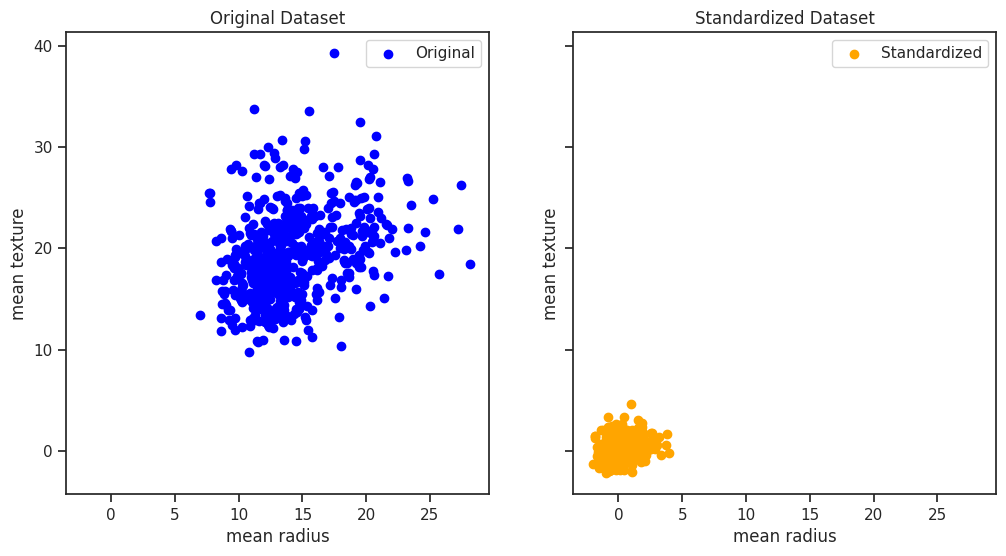

In [47]:
# Select the two features for visualization
feature1 = "mean radius"
feature2 = "mean texture"

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot the scatter plot of mean radius vs. mean texture for the original dataset
axs[0].scatter(data_cancer[feature1], data_cancer[feature2], c="blue", marker="o", label="Original")
axs[0].set_xlabel(feature1)
axs[0].set_ylabel(feature2)
axs[0].set_title("Original Dataset")

# Train the scaler on the original dataset
scaler = StandardScaler()
scaler.fit(data_cancer)

# Apply the trained scaler to standardize the dataset
standardized_data = scaler.transform(data_cancer)

# Convert the standardized data back to a DataFrame for visualization
standardized_df = pd.DataFrame(standardized_data, columns=data_cancer.columns)

# Plot the scatter plot of mean radius vs. mean texture for the standardized dataset
axs[1].scatter(standardized_df[feature1], standardized_df[feature2], c="orange", marker="o", label="Standardized")
axs[1].set_xlabel(feature1)
axs[1].set_ylabel(feature2)
axs[1].set_title("Standardized Dataset")

# Add a legend to the plots
axs[0].legend()
axs[1].legend()

# Show the figure
plt.show()


In [48]:
# run cell to test your implementation
assert len(fig.axes) == 2, "Ensure that you create a figure with two subplots"
assert np.all(np.abs(fig.axes[1].xaxis.get_data_interval()) < 5) and np.all(np.abs(fig.axes[1].yaxis.get_data_interval()) < 5), "Ensure that you visualize the standardized versions of mean radius and mean texture in the right subplot"
assert len(fig.axes[0].get_xlabel()) != 0 and len(fig.axes[0].get_ylabel()) != 0, "Check the first subplot's x and y labels"
assert len(fig.axes[0].title.get_text()), "Check the first subplot's title"
assert len(fig.axes[1].get_xlabel()) != 0 and len(fig.axes[1].get_ylabel()) != 0, "Check the second subplot's x and y labels"
assert len(fig.axes[1].title.get_text()), "Check the second subplot's title"

#### 5. Feature Visualization
* Visualize the features *mean radius*, *mean perimeter*, *mean area*, *worst radius*, and *worst perimeter* of the original dataset using a [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* Set the parameters such that you can differentiate between the classes
* Save the return values of the plot in a variable called ``pp``
* Have a look at the plot. Describe your thoughts about the correlation between features (in the cell below):

It allows us to identify patterns, correlations, and potential issues related to the data's structure, which can be valuable for feature selection, data preprocessing, and building accurate machine learning models.

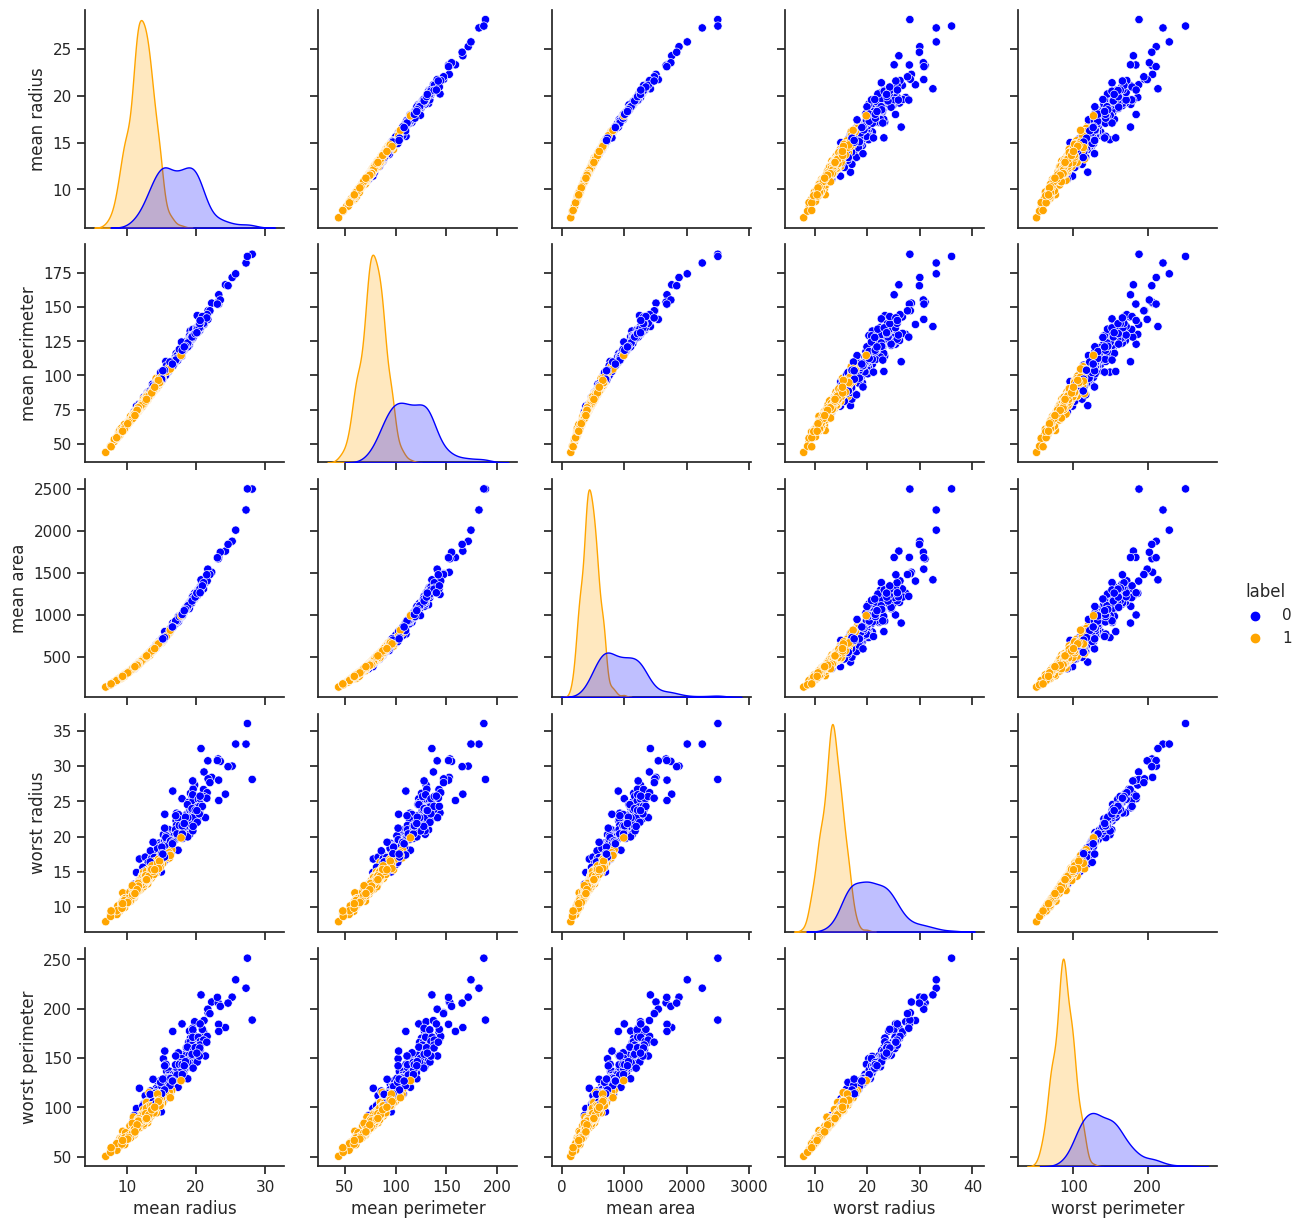

In [49]:
# Select the features for visualization
selected_features = ["mean radius", "mean perimeter", "mean area", "worst radius", "worst perimeter"]

# Concatenate selected features and labels into a new DataFrame
data_selected = pd.concat([data_cancer[selected_features], label_cancer], axis=1)

# Set seaborn plot style
sns.set(style="ticks")

# Create pairplot with different colors for each class
pp = sns.pairplot(data_selected, hue="label", palette={0: "blue", 1: "orange"})

# Show the plot
plt.show()


In [50]:
# run cell to test your implementation
assert type(pp) == sns.axisgrid.PairGrid, "Check that you create a pairplot using the seaborn library"
assert pp.x_vars == pp.y_vars and np.shape(pp.axes) == (5, 5), "Check that you create a pairplot"
assert set(pp.x_vars) == {"mean area", "mean perimeter", "mean radius", "worst perimeter", "worst radius"}, "Check the features in the pairplot"
assert pp.legend is not None, "Make sure that you can differentiate between the classes"

#### 6. Dimensionality Reduction (step: Data Preparation)
Create two functions ``train_pca`` and ``apply_pca`` that apply [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/decomposition.html#decompositions) to the dataset:
* ``train_pca`` has the parameters ``data`` and ``n_components`` and fits a PCA to ``data``:
    * ``data``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the data (rows: observations, columns: features)
    * ``n_components``: number of principal components to be kept
    * Create an instance of [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Set the parameters: *n_components*: ``n_components``, *svd_solver*: "full". Have a look at the *n_components* parameter, which options do you have to specify the parameter?
    * Use its methods to fit the PCA to ``data``
    * The function should return the trained PCA object
* ``apply_pca`` has the parameters ``pca`` and ``data`` and transforms ``data`` using ``pca``:
    * ``pca``: trained instance of [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    * ``data``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the data (rows: observations, columns: features)
    * Use the methods of ``pca`` to transform ``data``
    * The function should return an array containing the principal components

In [51]:
import numpy as np
from sklearn.decomposition import PCA

def train_pca(data, n_components):
    # Create an instance of PCA with the specified number of components
    pca = PCA(n_components=n_components, svd_solver="full")

    # Fit the PCA to the data
    pca.fit(data)

    return pca

def apply_pca(pca, data):
    # Use the trained PCA to transform the data
    transformed_data = pca.transform(data)

    return transformed_data


In [52]:
# run cell to test your implementation
pca = train_pca(data_cancer, 2)
assert type(pca) == sklearn.decomposition._pca.PCA, "Check that you train an return a PCA"
assert hasattr(pca, "components_"), "Ensure that you fit the PCA to your data"
data_pca = apply_pca(pca, data_cancer)
assert np.shape(data_pca) == (569, 2), "Check that you return the transformed data"
assert np.all(np.abs(np.mean(data_pca, axis=0)) < 1e-8), "Check that you return the transformed data"
assert np.all(np.mean(data_pca, axis=0) != data_cancer.mean(axis=0)[0:2].to_numpy()), "Check that you return the transformed data"
pca = train_pca(data_cancer, 0.8)
data_pca = apply_pca(pca, data_cancer)
assert np.shape(data_pca) == (569, 1), "Check that you accept also a value for explained variance as n_components"

#### 7. PCA Visualization
Use the functions of the tasks before to create two versions of the data set:
* ``data_pca``: consists of two principal components of the original data set
* ``data_scaled_pca``: consists of two principal components of the standardized data set

Run the cell below the tests to visualize the PCA results of the original and standardized data set.

In [53]:
# Convert the pandas DataFrame to a numpy array for PCA
data_array = data_cancer.values

# Set the desired number of principal components to keep
n_components = 2

# Train the PCA on the original dataset
pca = train_pca(data_array, n_components)

# Apply the trained PCA to transform the original dataset
data_pca = apply_pca(pca, data_array)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the original dataset and transform it to standardized data
data_standardized = scaler.fit_transform(data_array)

# Train the PCA on the standardized dataset
pca_scaled = train_pca(data_standardized, n_components)

# Apply the trained PCA to transform the standardized dataset
data_scaled_pca = apply_pca(pca_scaled, data_standardized)

In [54]:
# run cell to test your implementation
assert np.shape(data_pca) == (569, 2),  "Check that you reduce the original dataset to two principal components"
assert np.std(data_pca) > 470, "Check that you apply pca to the original dataset in data_pca"
assert np.shape(data_scaled_pca) == (569, 2), "Check that you reduce the standardized dataset to two principal components"
assert np.std(data_scaled_pca) > 3, "Check that you standardized the data in data_scaled_pca before applying pca"

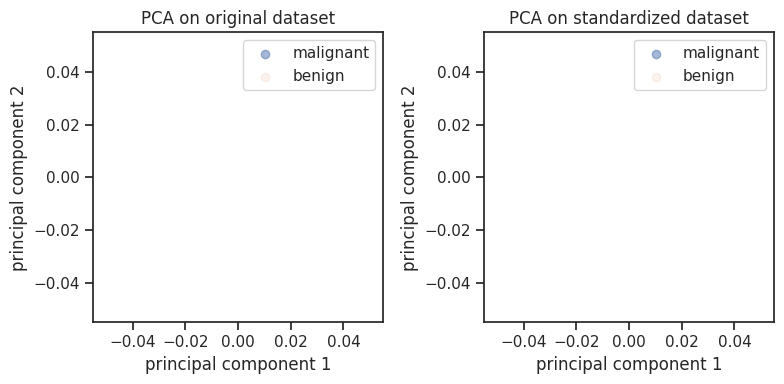

In [55]:
# run cell to visualize the PCA results of the original and standardized dataset
fig, axs = plt.subplots(ncols=2, figsize=(8,4))

axs[0].scatter(data_pca[label_cancer["label"]=="malignant", 0], data_pca[label_cancer["label"]=="malignant", 1], alpha=0.5, label="malignant")
axs[0].scatter(data_pca[label_cancer["label"]=="benign", 0], data_pca[label_cancer["label"]=="benign", 1], alpha=0.1, label="benign")
axs[0].legend()

axs[1].scatter(data_scaled_pca[label_cancer["label"]=="malignant", 0], data_scaled_pca[label_cancer["label"]=="malignant", 1], alpha=0.5, label="malignant")
axs[1].scatter(data_scaled_pca[label_cancer["label"]=="benign", 0], data_scaled_pca[label_cancer["label"]=="benign", 1], alpha=0.1, label="benign")
axs[1].legend()

for ax, t in zip(axs, ["PCA on original dataset", "PCA on standardized dataset"]):
    ax.set_xlabel("principal component 1")
    ax.set_ylabel("principal component 2")
    ax.set_title(t)

fig.tight_layout()

#### 8. Train Test Split (step: Data Segregation)
Create a function ``split_data`` that takes the parameters ``data``, ``labels``, and ``test_size`` and splits ``data`` and ``labels`` into a training and test dataset:
* ``data``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the dataset (rows: observations, columns: features)
* ``labels``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the labels for all observations
* ``test_size``: ``float`` between 0 and 1, describing the size of the test dataset
* Use the [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate a train test split from ``data`` and ``labels``
    * Use the *stratify* parameter of the function
    * Set the random state to 10
* The function should return a tuple of the into train and test dataset split dataset (in this order: data_train, data_test, label_train, label_test)
* Describe your thoughts about the following questions in the cell below:
    * Why do you think a Train Test Split is necessary for classifier training?
    * In which cases could stratification be important?

1.Train Test Split is necessary for classifier training to evaluate model performance on unseen data and prevent overfitting.
2.Stratification is important in cases of imbalanced classes or when maintaining the representative distribution of classes in both the training and test sets is essential for more robust model evaluation.

In [56]:
from sklearn.model_selection import train_test_split

def split_data(data, labels, test_size):

    # Perform the train-test split with stratification
    data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=test_size, stratify=labels, random_state=10)

    return data_train, data_test, label_train, label_test


In [57]:
# run cell to test your implementation
data_test = np.array(range(100)).reshape(20, -1); label_test = np.zeros(20); label_test[2:] = 1
data_split = split_data(data_test, label_test, 0.3)
assert type(data_split) == tuple, "Check that you return a tuple of your return values"
assert np.shape(data_split[0]) == (14, 5) and np.shape(data_split[1]) == (6, 5) and np.shape(data_split[2]) == (14,) and np.shape(data_split[3]) == (6,), "Check that your return values are in the right order"
assert np.sum(data_split[3]) < 6, "Check that you set the stratify parameter correctly"

#### 9. Classification
In this task, you will create functions that you will later need to train a classifier and evaluate its performance.
##### 9.1 Classifier Training (step: Model Training)
Create a function ``train_classifier`` with the parameters ``data`` and ``labels`` that fits a Support Vector Machine (SVM) to ``data``:
* ``data``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the dataset (rows: observations, columns: features)
* ``labels``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the labels for all observations
* Create an instance of [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Set the parameters *kernel*: "rbf", *random_state*: 10.
* Use its methods to fit the SVM to ``data`` and ``labels``
* The function should return the trained classifier object

In [58]:
from sklearn.svm import SVC

def train_classifier(data, labels):
    # Create an instance of SVC with the specified kernel and random_state
    classifier = SVC(kernel="rbf", random_state=10)

    # Fit the SVM to the data and labels
    classifier.fit(data, labels)

    return classifier


In [59]:
# run cell to test your implementation
data_test = np.array(range(50)).reshape(10, -1); label_test = np.zeros(10); label_test[5:] = 1
clf = train_classifier(data_test, label_test)
assert type(clf) == sklearn.svm._classes.SVC, "Ensure that you train a classifier of type sklearn.svm.SVC"
assert clf.kernel == "rbf", "Ensure that you set your kernel to rbf"
assert clf.random_state == 10, "Ensure that you set the classifier's random_state to 10"
assert hasattr(clf, "classes_"), "Ensure that you train the classifier"

##### 9.2 Classifier Evaluation - Mean Accuracy (step: Model Evaluation)
Create a function ``calc_score`` with the parameters ``clf``, ``data``, and ``labels``
* ``clf``: trained classifier object
* ``data``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the dataset (rows: observations, columns: features)
* ``labels``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the labels for all observations
* Use the methods of ``clf`` to calculate the classifier's mean accuracy using ``data`` and ``labels``
* The function should return the mean accuracy

In [60]:
def calc_score(clf, data, labels):
    # Use the trained classifier to predict labels on the data
    predicted_labels = clf.predict(data)

    # Calculate the mean accuracy of the classifier
    accuracy = clf.score(data, labels)

    return accuracy


In [61]:
# run cell to test your implementation
data_test = np.array(range(50)).reshape(10, -1); label_test = np.zeros(10); label_test[5:] = 1
clf = train_classifier(data_test, label_test)
data_test = np.array(range(10, 60)).reshape(10, -1)
assert calc_score(clf, data_test, label_test) == 0.8, "Ensure that you calculate the accuracy using the trained classifier and the parameters data and labels"

##### 9.3 Classifier Evaluation - Confusion Matrix (step: Model Evaluation)
Create a function ``plot_confusion_matrix`` with the parameters ``clf``, ``data``, and ``labels`` that plots a confusion matrix according to the data:
* ``clf``: trained classifier object
* ``data``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the dataset (rows: observations, columns: features)
* ``labels``: ``numpy.ndarray`` or ``pandas.DataFrame`` containing the labels for all observations
* Use the example code of [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to create a plot of a confusion matrix based on ``data`` and ``labels``
* The function should plot the confusion matrix and return the [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) object (just for testing purposes)

In [62]:
def plot_confusion_matrix(clf, data, labels):

    # Use the trained classifier to predict labels on the data
    predicted_labels = clf.predict(data)

    # Calculate the confusion matrix
    cm = confusion_matrix(labels, predicted_labels)

    # Plot the confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

    # Create a ConfusionMatrixDisplay object for testing purposes
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Show the plot
    plt.show()

    return disp


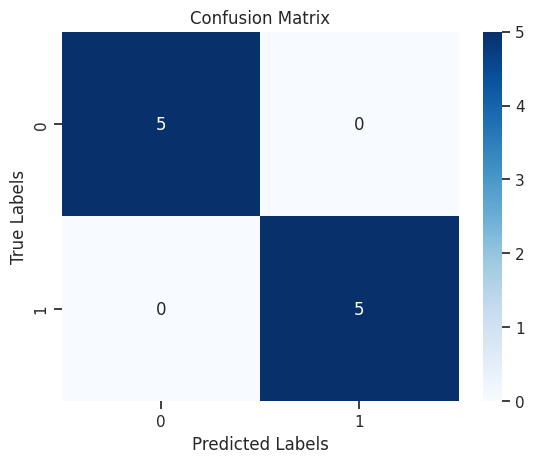

In [63]:
# run cell to test your implementation
data_test = np.array(range(50)).reshape(10, -1); label_test = np.zeros(10); label_test[5:] = 1
clf = train_classifier(data_test, label_test)
cm = plot_confusion_matrix(clf, data_test, label_test)
assert type(cm) == sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
assert np.all(cm.confusion_matrix == np.array([[5, 0], [0, 5]]))

##### 9.4 Train a SVM classifier on a training data set and evaluate its performance on a separate test data set. To do so:
* Create a train test split of your data with a test size of 0.3
* Standardize the training data set and reduce its dimensionality to two components using PCA
* Train the classifier and save it in a variable called ``clf``
* Evaluate the performance of the trained classifier with the test data set:
    * Which steps do you have to perform on the independent test data set before?
    * Plot the confusion matrix for the test data set
    * Calculate the mean accuracy for the train and test data set separately. Store the values in variables called ``clf_train_acc`` and ``clf_test_acc``.

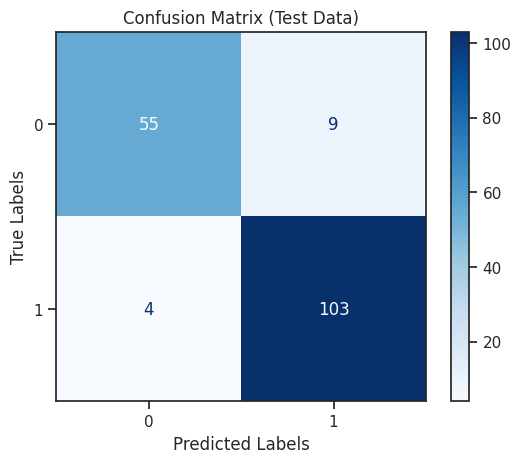

Mean Accuracy (Train Data): 0.9396984924623115
Mean Accuracy (Test Data): 0.9239766081871345


In [64]:
# Step 1: Create a Train-Test Split
data_train, data_test, label_train, label_test = train_test_split(data_cancer, label_cancer, test_size=0.3, stratify=label_cancer, random_state=10)

# Step 2: Standardize the Training Data and Reduce Dimensionality with PCA
scaler = StandardScaler()
data_train_standardized = scaler.fit_transform(data_train)
data_test_standardized = scaler.transform(data_test)

pca = PCA(n_components=2, svd_solver="full")
data_train_pca = pca.fit_transform(data_train_standardized)
data_test_pca = pca.transform(data_test_standardized)

# Step 3: Train the SVM Classifier
clf = SVC(kernel="rbf", random_state=10)
clf.fit(data_train_pca, label_train)

# Step 4: Preprocess the Independent Test Data
# Already done during Step 2 with standardization and PCA transformation

# Step 5: Evaluate Performance on the Test Data
# Predict labels for the test data
predicted_labels = clf.predict(data_test_pca)

# Plot the confusion matrix for the test data
cm = confusion_matrix(label_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Data)")
plt.show()

# Calculate the mean accuracy for the train and test datasets separately
clf_train_acc = clf.score(data_train_pca, label_train)
clf_test_acc = clf.score(data_test_pca, label_test)
print("Mean Accuracy (Train Data):", clf_train_acc)
print("Mean Accuracy (Test Data):", clf_test_acc)


In [65]:
# run cell to test your implementation
assert clf_train_acc > 0.94 and clf_test_acc > 0.93, "Check that you perform all the steps you performed for the training data set also for the test data set"
assert clf.predict([[0, 5]])[0] == "benign" and clf.predict([[5, 0]])[0] == "malignant", "Check that you performed the Standardization and PCA on the training data set before training the classifier"

AssertionError: ignored

##### 9.5 Use the given function ``plot_decision_boundary()`` to visualize the decision boundary for your classifier:
* ``clf``: trained classifier
* ``data``: ``numpy.ndarray`` containing the training data set
* ``label``: ``pandas.DataFrame`` containing the labels for the training data set

In [66]:
def plot_decision_boundary(clf, data, label):
    x, y = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max()), np.linspace(data[:, 1].min(), data[:, 1].max()))
    grid = np.vstack([x.ravel(), y.ravel()]).T

    y_pred = np.reshape(clf.predict(grid), x.shape)
    y_pred[y_pred=="malignant"] = 0
    y_pred[y_pred=="benign"] = 1
    y_pred = np.array(y_pred, dtype=float)

    display = DecisionBoundaryDisplay(xx0=x, xx1=y, response=y_pred)
    display.plot()
    display.ax_.scatter(data[label["label"]=="malignant", 0], data[label["label"]=="malignant", 1], label="malignant", alpha=0.5)
    display.ax_.scatter(data[label["label"]=="benign", 0], data[label["label"]=="benign", 1], label="benign", alpha=0.5)
    display.ax_.legend()

In [ ]:
plot_decision_boundary(clf, data_train_pca, label_train)

### **Bonus Tasks** (5 points)
The Bonus Tasks consist of three sub-tasks about Regression, Clustering, and Classification.
#### 1. Regression
In this task, we use the Diabetes dataset provided by ``sklearn``. The dataset includes four baseline features like age and body mass index and six blood serum measurements of 442 diabetes patients. All 10 features are standardized. As labels the response of interest, a quantitative measure of disease progression one year after baseline is provided. For more information, you can read the description provided by ``sklearn`` (``diabetes["DESCR"]``). The goal of this task is to predict the disease progression from the features using a regression model. For easier visualization, we will perform the regression only on one of the provided features.

In [67]:
# run cell to load the diabetes features and label data frames
diabetes = load_diabetes()
data_diabetes = pd.DataFrame(data=diabetes["data"], columns=diabetes["feature_names"])
label_diabetes = pd.DataFrame(diabetes["target"], columns=["label"])
data_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [68]:
label_diabetes.head()

,label
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


##### 1.1 Since we do not have distinct class values as labels, we cannot use the ``split_data()`` function from above to divide our data into a train and test dataset. Therefore, we will use the last 130 observations (approximately 30 %) as test dataset. Create four data frames called ``X_train``, ``X_test``, ``Y_train``, and ``Y_test``:
* ``X_Train`` should contain the first 312 elements of column **s5** of ``data_diabetes``
* ``X_Test`` should contain the last 130 elements of column **s5** of ``data_diabetes``
* ``Y_Train`` should contain the first 312 labels of ``label_diabetes``
* ``Y_Test`` should contain the last 130 labels of ``label_diabetes``

In [69]:
test_size = 130 # observations

# Create the data frames as per the requirements
X_train = data_diabetes["s5"].iloc[:312].to_frame()
X_test = data_diabetes["s5"].iloc[312:].to_frame()
Y_train = label_diabetes["label"].iloc[:312].to_frame()
Y_test = label_diabetes["label"].iloc[312:].to_frame()

# Print the data frame shapes (optional, for verification)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (312, 1)
X_test shape: (130, 1)
Y_train shape: (312, 1)
Y_test shape: (130, 1)


In [70]:
# run cell to test your implementation
assert type(X_train) == pd.DataFrame and type(X_test) == pd.DataFrame and type(Y_train) == pd.DataFrame and type(Y_test) == pd.DataFrame, "Check that all four variables are of type pandas.DataFrame"
assert X_train.shape == (312, 1) and Y_train.shape == (312, 1) and X_test.shape == (130, 1) and Y_test.shape == (130, 1), "Check that you make the split correctly. The test set must have 130 observations"
assert X_train.sum()[0] > -0.8 and X_train.sum()[0] < -0.7, "Check that you use the last 130 observations as test set"

##### 1.2 Fit a Linear Regression to ``X_train`` and ``Y_train`` and evaluate the performance on ``X_test`` and ``Y_test``:
* Create an instance of [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) called ``regr`` and use its methods to fit the model to ``X_train`` and ``Y_train``
* Calculate the Mean Squared Error between the true and predicted labels. You can use [sklearn.metric.mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) for that. Save the value in a variable called ``test_error``.

In [73]:
# Fit a Linear Regression model to X_train and Y_train
regr = LinearRegression()
regr.fit(X_train, Y_train)

# Predict on X_test using the trained model
Y_test_pred = regr.predict(X_test)

# Calculate the Mean Squared Error (MSE) between true and predicted labels
test_error = mean_squared_error(Y_test, Y_test_pred)


print("Mean squared error: %.2f" % test_error)

Mean squared error: 4248.17


In [74]:
# run cell to test your implementation
assert type(regr) == sklearn.linear_model.LinearRegression, "Ensure that you train a Linear Regression Model"
assert hasattr(regr, "coef_"), "Ensure that you fit the Linear Regression model to the data"
warnings.simplefilter("ignore")
assert regr.predict([[0.3]])[0] > 448, "Ensure that you fit the model to the correct data"
assert test_error > 4245, "Ensure that you calculate the Mean Squared Error correctly"

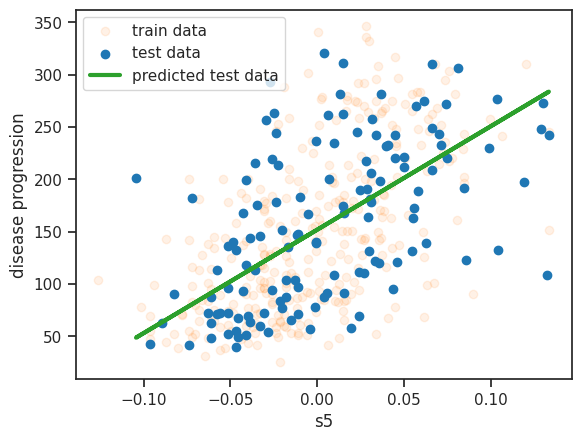

In [75]:
# run cell to visualize the results
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, color="tab:orange", alpha=0.1, label="train data")
ax.scatter(X_test, Y_test, color="tab:blue", label="test data")
ax.plot(X_test, Y_test_pred, color="tab:green", linewidth=3, label="predicted test data")
ax.legend()
ax.set_xlabel("s5")
_ = ax.set_ylabel("disease progression")

#### 2. Clustering
For the clustering task, we will use an artificial dataset consisting of three different Gaussian distributions which serve as three clusters. The goal of this task is to assign a label to every data point that indicates to which of the clusters they belong.

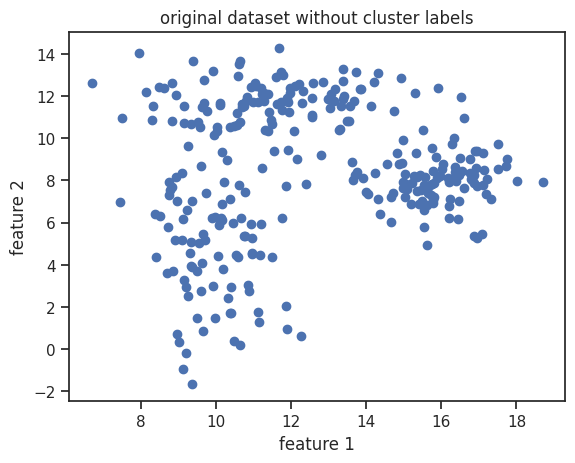

In [76]:
# run cell to create and visualize the artificial dataset
np.random.seed(0)
gauss_1 = np.random.normal(loc=(10, 5), scale=(1, 3), size=(100, 2))
gauss_2 = np.random.normal(loc=(12, 12), scale=(2, 1), size=(100, 2))
gauss_3 = np.random.normal(loc=(16, 8), scale=1, size=(100, 2))
data_cluster = np.concatenate([gauss_1, gauss_2, gauss_3])
fig, ax = plt.subplots()
ax.scatter(data_cluster[:, 0], data_cluster[:, 1])
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
_ = ax.set_title("original dataset without cluster labels")

##### 2.1 Use a K-Means Clustering algorithm to assign a cluster label to every data point in ``data_cluster``:
* Create an instance of [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) called ``kmeans``. Set the parameters *n_clusters*: 3, *random_state*: 10, *n_init*: "auto".
* Use ``kmeans`` methods to fit the model to ``data_cluster``
* Store the predicted labels in a variable called ``labels_pred``

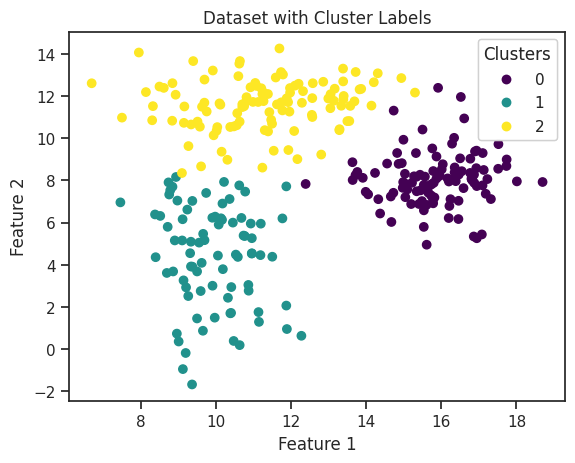

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create the artificial dataset
np.random.seed(0)
gauss_1 = np.random.normal(loc=(10, 5), scale=(1, 3), size=(100, 2))
gauss_2 = np.random.normal(loc=(12, 12), scale=(2, 1), size=(100, 2))
gauss_3 = np.random.normal(loc=(16, 8), scale=1, size=(100, 2))
data_cluster = np.concatenate([gauss_1, gauss_2, gauss_3])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=10, n_init="auto")
labels_pred = kmeans.fit_predict(data_cluster)

# Visualize the clustered data
fig, ax = plt.subplots()
scatter = ax.scatter(data_cluster[:, 0], data_cluster[:, 1], c=labels_pred, cmap='viridis')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
_ = ax.set_title("Dataset with Cluster Labels")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()



In [78]:
# run cell to test your implementation
assert type(kmeans) == KMeans, "Ensure that you use a KMeans model for clustering"
assert kmeans.n_clusters == 3 and kmeans.random_state == 10 and kmeans.n_init == "auto", "Check if you set the parameters of the KMeans model correctly"
assert hasattr(kmeans, "cluster_centers_"), "Ensure that you fit the KMeans model to the data"
assert np.shape(labels_pred) == (300,) and np.sum(labels_pred) > 300, "Ensure that you used the predicted labels of the trained KMeans model"

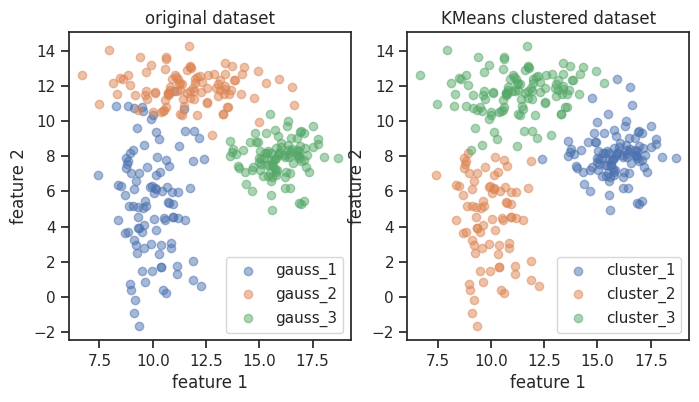

In [79]:
# run cell to visualize the results
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].scatter(gauss_1[:, 0], gauss_1[:, 1], label="gauss_1", alpha=0.5)
axs[0].scatter(gauss_2[:, 0], gauss_2[:, 1], label="gauss_2", alpha=0.5)
axs[0].scatter(gauss_3[:, 0], gauss_3[:, 1], label="gauss_3", alpha=0.5)
axs[1].scatter(data_cluster[labels_pred==0, 0], data_cluster[labels_pred==0, 1], label="cluster_1", alpha=0.5)
axs[1].scatter(data_cluster[labels_pred==1, 0], data_cluster[labels_pred==1, 1], label="cluster_2", alpha=0.5)
_ = axs[1].scatter(data_cluster[labels_pred==2, 0], data_cluster[labels_pred==2, 1], label="cluster_3", alpha=0.5)
for ax, t in zip(axs, ["original dataset", "KMeans clustered dataset"]):
    ax.legend()
    ax.set_title(t)
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")

#### 3. Classification
For the classification task, we use the cortisol data set that has been included in some of the last assignments. Five Saliva features are computed for 26 participants which are divided into two groups *Intervention* and *Control*. The goal of this task is to fit a Random Forest Classifier to different (sub-)sets of the dataset.

In [80]:
import biopsykit as bp
# run cell to load cortisol dataset
cortisol = bp.example_data.get_saliva_example()
sample_times = [-30, -1, 30, 40, 50, 60, 70]
auc = bp.saliva.auc(
    cortisol, saliva_type="cortisol", sample_times=sample_times, compute_auc_post=True, remove_s0=True
)
max_inc = bp.saliva.max_increase(cortisol, saliva_type="cortisol", remove_s0=True)
slope = bp.saliva.slope(cortisol, sample_idx=[1, 4], sample_times=sample_times, saliva_type="cortisol")

cort_features = pd.concat([auc, max_inc, slope], axis=1)
label_cortisol = np.array(cort_features.index.get_level_values(0))
data_cortisol = cort_features.droplevel(0, axis=0)
data_cortisol.head()

saliva_feature,cortisol_auc_g,cortisol_auc_i,cortisol_auc_i_post,cortisol_max_inc,cortisol_slope14
subject,,,,,
Vp03,870.418075,-72.035925,104.05725,0.95600,0.013971
Vp06,745.785975,305.071225,181.75300,9.44625,0.141828
Vp08,261.263925,84.065675,50.55200,3.01050,0.045958
Vp09,349.085125,-107.491025,0.65350,-1.40395,-0.027528
Vp11,477.073050,56.433550,19.71475,2.19135,0.042968


##### 3.1 Train the classifier on the complete dataset:
* Create an instance of [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) called ``clf``. Set the parameters *n_estimators*: 100, *random_state*: 10.
* Use the methods of ``clf`` to fit the model to ``data_cortisol`` and ``label_cortisol``
* Calculate the mean accuracy of the dataset and save it in a variable ``data_score``
* Describe your thoughts about the following questions in the cell below:
    * How would you interpret this result?
    * What can you tell about the generalizability of this model to unknown data?

High accuracy on the training data is a positive sign but it is crucial to evaluate the model on unseen test data to determine its generalizability and robustness to new examples.

In [81]:
# Create an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=10)

# Fit the model to the complete dataset
clf.fit(data_cortisol, label_cortisol)

# Predict on the training data to calculate mean accuracy
y_pred_train = clf.predict(data_cortisol)

# Calculate the mean accuracy of the dataset
data_score = accuracy_score(label_cortisol, y_pred_train)
print("Mean Accuracy on Complete Dataset:", data_score)


print("Classifier Data Score:", data_score)

Mean Accuracy on Complete Dataset: 1.0
Classifier Data Score: 1.0


In [82]:
# run cell to test your implementation
assert type(clf) == sklearn.ensemble.RandomForestClassifier, "Check if you train a classifer of type RandomForestClassifier"
assert clf.n_estimators == 100 and clf.random_state == 10, "Check the parameters of the classifier"
assert hasattr(clf, "classes_"), "Make sure that you fit the classifier"
warnings.simplefilter("ignore")
assert clf.predict([[300, 20, 40, 4, 0.03]])[0] == "Control" and clf.predict([[350, -10, 50, 0.7, 0]])[0] == "Intervention", "Make sure to train the classifier on the correct data set"
assert data_score == 1, "Make sure to train the classifier on the correct data set"

##### 3.2 Train the classifier on a train test split of the dataset:
* Create an instance of [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) called ``clf``. Set the parameters *n_estimators*: 100, *random_state*: 10.
* Create a train test split of ``data_cortisol`` and ``label_cortisol`` using ``split_data()``. Use a test size of 0.3.
* Use the methods of ``clf`` to fit the model to the training dataset
* Calculate the mean accuracy of the training and test dataset separately and save it in variables called ``train_score`` and ``test_score``
* Describe your thoughts about the following questions in the cell below:
    * Why do you think is there such a big difference between that training and test model accuracy?
    * What can you tell about the generalizability of this model to unknown data?

1. Big difference between training and test model accuracy is due to overfitting.
2.To assess the generalizability of the model to unknown data, we need to focus on the accuracy on the test dataset. If the test accuracy is significantly lower than the training accuracy, it indicates that the model is overfitting and might not perform well on new, unseen data. To improve the model's generalizability, techniques such as regularization, cross-validation, or feature selection can be applied.

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=10)

# Create a train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(data_cortisol, label_cortisol, test_size=0.3, random_state=10)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict on the training data to calculate mean accuracy of the training dataset
y_pred_train = clf.predict(X_train)

# Predict on the test data to calculate mean accuracy of the test dataset
y_pred_test = clf.predict(X_test)

# Calculate the mean accuracy of the training dataset
train_score = accuracy_score(y_train, y_pred_train)

# Calculate the mean accuracy of the test dataset
test_score = accuracy_score(y_test, y_pred_test)

print("Mean Accuracy on Training Dataset:", train_score)
print("Mean Accuracy on Test Dataset:", test_score)

Mean Accuracy on Training Dataset: 1.0
Mean Accuracy on Test Dataset: 0.375


In [86]:
# run cell to test your implementation
assert type(clf) == sklearn.ensemble.RandomForestClassifier, "Check if you train a classifer of type RandomForestClassifier"
assert clf.n_estimators == 100 and clf.random_state == 10, "Check the parameters of the classifier"
assert hasattr(clf, "classes_"), "Make sure that you fit the classifier"
warnings.simplefilter("ignore")
assert clf.predict([[350, 20, 40, 4, 0.03]])[0] == "Control" and clf.predict([[350, -10, 50, 0.7, 0]])[0] == "Intervention", "Make sure to train the classifier on the correct data set"
assert train_score == 1, "Make sure to train the classifier on the correct data set"
assert test_score == 0.625, "Make sure to calculate the accuracy for the separate test set"

AssertionError: ignored

##### 3.3 Train the classifier using Cross-Validation:
* Create an instance of [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) called ``clf``. Set the parameters *n_estimators*: 100, *random_state*: 10.
* Use [sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to train ``clf`` on the whole dataset using a 5-fold Cross-Validation. Set the parameter *cv*: 5
* Calculate the mean standard deviation over the 5 test scores and save them in the variables called ``test_score_mean`` and ``test_score_std``
* Describe you thoughts about the following questions in the cell below:
    * What are the advantages of using Cross-Validation?
    * What can you tell about the robustness of this model?

1.Cross-Validation has several advantages like effective use of data, reduced bias in performance evaluation, model selection and hyperparameter tuning

2.Based on the low standard deviation of the test scores, we can conclude that this model is robust. It shows consistent performance across different data splits, which implies that it is likely to perform well on unseen data and is not overfitting to the training data.

In [87]:
# Create an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=10)

# Perform Cross-Validation with 5 folds
cv_results = cross_validate(clf, data_cortisol, label_cortisol, cv=5)

# Calculate the mean and standard deviation of the test scores
test_scores = cv_results['test_score']
test_score_mean = np.mean(test_scores)
test_score_std = np.std(test_scores)

print("Mean Test Score:", test_score_mean)
print("Test Score Standard Deviation:", test_score_std)


# print("Mean squared error: %.2f" % test_error)
print("Classifier Test score (mean \u00B1 std): %.2f \u00B1 %.2f" % (test_score_mean, test_score_std))

Mean Test Score: 0.6599999999999999
Test Score Standard Deviation: 0.12000000000000002
Classifier Test score (mean ± std): 0.66 ± 0.12


In [88]:
# run cell to test your implementation
assert type(clf) == sklearn.ensemble.RandomForestClassifier, "Check if you train a classifer of type RandomForestClassifier"
assert clf.n_estimators == 100 and clf.random_state == 10, "Check the parameters of the classifier"
assert hasattr(clf, "classes_") == False, "Make sure to train the classifiers using cross_validate"
assert test_score_mean > 0.6 and test_score_std > 0.11, "Make sure to calculate the mean accuracy and standard deviation from the return values from cross_validate()"